In [1]:
import pandas as pd
import numpy as np
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

wine =  pd.read_csv("wine.csv")
wine

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class Label
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,NaN,5.64,1.04,NaN,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [2]:
wine["Proanthocyanins"] = wine["Proanthocyanins"].fillna(wine["Proanthocyanins"].mean())

wine["OD280/OD315 of diluted wines"] = wine["OD280/OD315 of diluted wines"].fillna(wine["OD280/OD315 of diluted wines"].mean())

In [20]:
scaler = StandardScaler()
scaler.fit(wine.drop("Class Label", axis=1)) # compute the mean and std to be used for later scaling

x = pd.DataFrame(scaler.transform(wine.drop("Class Label", axis=1)), columns=wine.columns[:-1])
y = wine[["Class Label"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

mlp = MLPClassifier(random_state=10, max_iter=300, hidden_layer_sizes=200, activation="relu", solver="adam")
mlp.fit(x_train,y_train.values.ravel()) # logistic, tanh / adam, sgd, lbfgs 
y_hat = mlp.predict(x_test)

mlp.score(x_test, y_test)

0.9814814814814815

![image](acrivate_function.png)

In [14]:
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)

predicted = pd.concat([x_test, pd.DataFrame(y_hat, columns = ["Class Label"], index = test.index.to_list())], axis=1)

In [5]:
def compare(pair, colormap):
    sns.pairplot(
        data = test, 
        x_vars = pair[0], y_vars = pair[1],
        height = 4,
        hue = "Class Label",
        palette = colormap,
    ).fig.suptitle("Test data",  y=1.05)

    sns.pairplot(
        data = predicted, 
        x_vars = pair[0], y_vars = pair[1],
        height = 4,
        hue = "Class Label",
        palette = colormap
    ).fig.suptitle("Predicted data",  y=1.05)

    return plt.show()

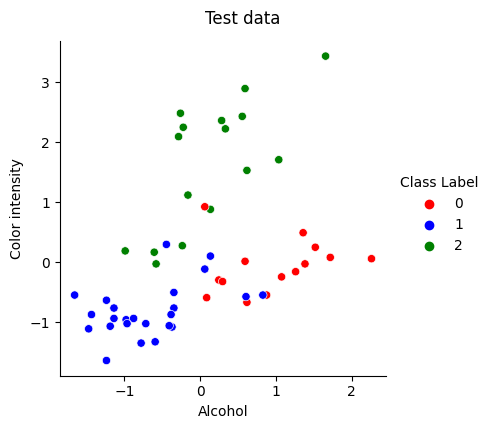

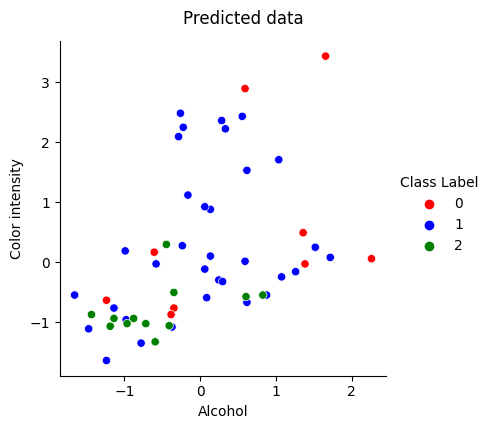

In [15]:
pair = ["Alcohol", "Color intensity"]
colormap = {
    0: "red", 
    1: "blue", 
    2: "green"
}

compare(pair, colormap)